In [11]:
from src.onnx_pipeline import YOLOv8Seg
import cv2
import time
import matplotlib.pyplot as plt

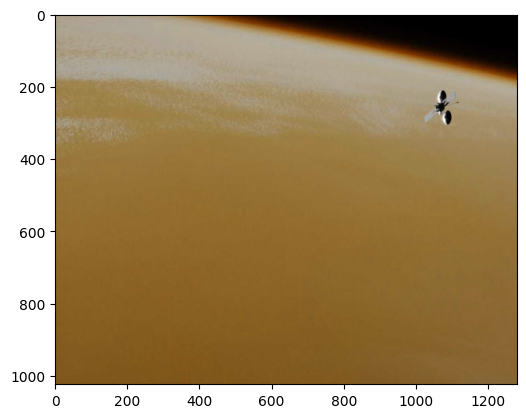

In [12]:
model = "assets/model.onnx"
input = "assets/input_img.png"
num_threads = 4
num_streams = 1

img = cv2.imread(input, cv2.IMREAD_COLOR)

plt.imshow(img)
plt.show()

2
(1, 37, 8400) (1, 32, 160, 160)
1023 212 1118 308 0.8863518834114075 0.0


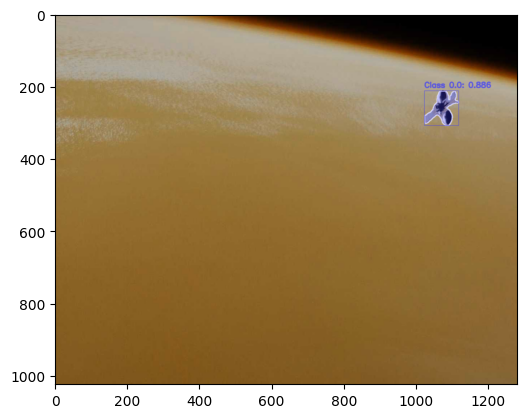

Inference time: 0.47 seconds


In [13]:
start_time = time.time()

# Initialize the model
model = YOLOv8Seg(model, num_threads=num_threads, num_streams=num_streams)

# Run inference
boxes, segments, _ = model(img, conf_threshold=0.4, iou_threshold=0.45)

# Draw and visualize the result
if len(boxes) > 0:
    output_image = model.draw_and_visualize(img, boxes, segments, vis=False, save=True)
else:
    output_image = img

end_time = time.time()

plt.imshow(output_image)
plt.show()
print(f"Inference time: {end_time - start_time:.2f} seconds")